In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df= pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


**Part 1:** Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [4]:
categorical= df.select_dtypes(exclude="number")

In [5]:
numerical= df.select_dtypes(include="number")

In [6]:
df.isna().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
df.eq(" ").sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [12]:
frequency_table = categorical.category.value_counts()
frequency_table.reset_index().head(5)
#top 5 product categories

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


The top 5 products categories are sport & outdoors; beauty; handmade clothing, shoes & accessories; bath & body and birthday gifts

In [14]:
proportion_table = categorical.category.value_counts(normalize=True)
proportion_table.reset_index().head(5)

,category,proportion
0,Sports & Outdoors,0.342219
1,Beauty,0.007903
2,"Handmade Clothing, Shoes & Accessories",0.007869
3,Bath & Body,0.007813
4,Birthday Gifts,0.007766


In [49]:
df2= pd.concat([frequency_table, proportion_table], axis=1)
df2.columns = ['absolute_frequency', 'relative_frequency']
df2= df2.reset_index().head(5) #tens de assign outra vez para teres as columns todas

In [46]:
df2.columns

Index(['category', 'absolute_frequency', 'relative_frequency'], dtype='object')

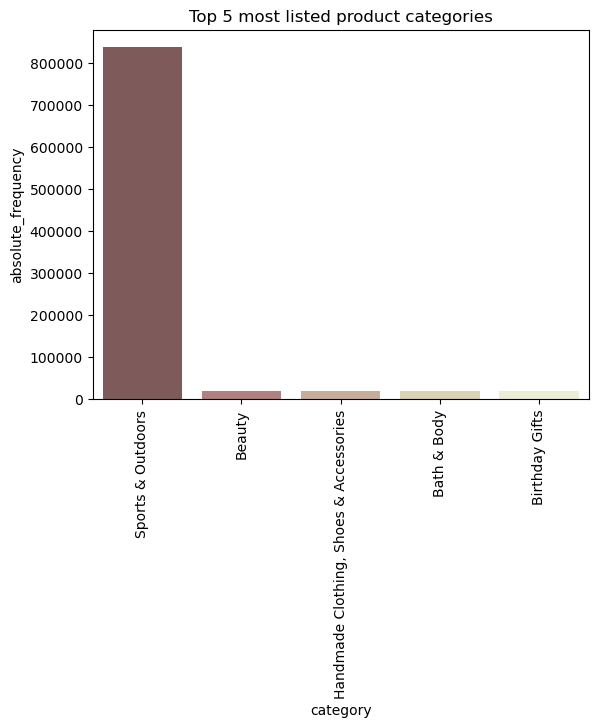

In [60]:
sns.barplot(x= "category", 
            y="absolute_frequency", 
            data= df2, 
            palette= "pink")
plt.xticks(rotation=90)
plt.title("Top 5 most listed product categories")
plt.show()

In [64]:
proportion_table_top5= proportion_table.head(5)

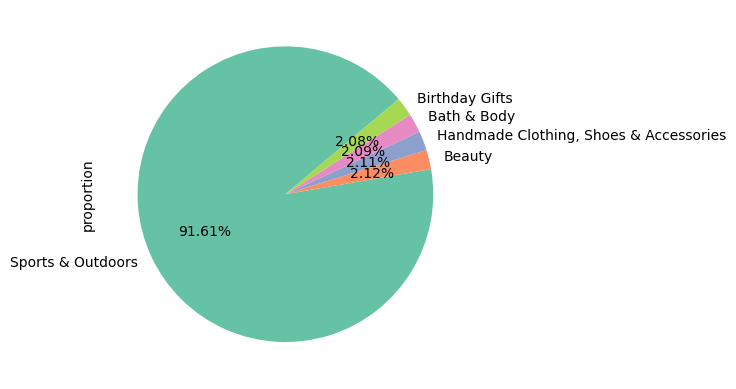

In [73]:
proportion_table_top5.plot.pie(autopct='%1.2f%%' ,startangle=40, colors=sns.color_palette('Set2'))
plt.show()

In both charts we can see the predominance of the category of Sports & Outdoors, a huge difference comapred to the remaining categories

**Part 2:** Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [86]:
mean_price= df.price.mean()
round(mean_price, 2)

89.24

In [81]:
median_price= df.price.median()
round(median_price, 2)

19.09

In [84]:
mode_price= df.price.mode()
mode_price

0    9.99
Name: price, dtype: float64

The average price point of products listed is 89.24 pounds
The median is notably lower than the mean, which indicates that there is a positive skew. Upon analysing the mode, median and mean we can conclude that most of the prices are low like 9.99 pounds but some products are way more expensive messing up with the mean (the outliers).

In [88]:
variance_price= df.price.var()
round(variance_price,2)

119445.49

In [90]:
std_price= df.price.std()
round(std_price,2)

345.61

In [94]:
range_price= df.price.max()-df.price.min()
range_price

100000.0

In [97]:
#não confudir mean com interquartile, mean = average -/- interquartile= q3- q1
q3_price= df.price.quantile(0.75)
q3_price

45.99

In [98]:
q1_price= df.price.quantile(0.25)
q1_price

9.99

In [99]:
interquartile_price= q3_price-q1_price
interquartile_price

36.0

In [93]:
#summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


The variance is 119445.49 and the standard deviation is 345.61 which indicates a huge difference of the prices. As we saw before most of the prices are 9.99 pounds(mode), and has the median is notably lower than the mean in adition with the range 100.000 pounds we can see that there are many outliers that are messing up with the data. Including that the interquartile 36 pounds means that 50% of the data is spread around those values.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


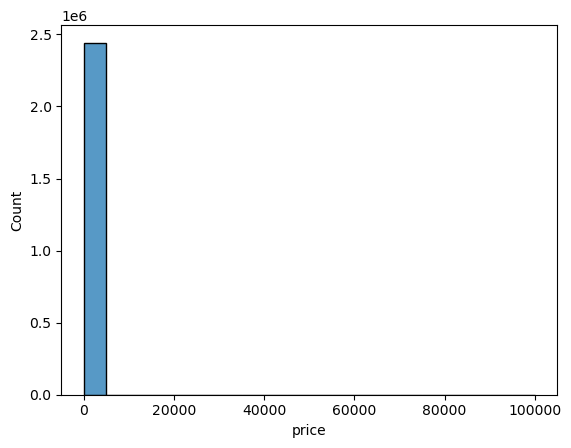

In [105]:
sns.histplot(df.price, bins=20)
plt.show()

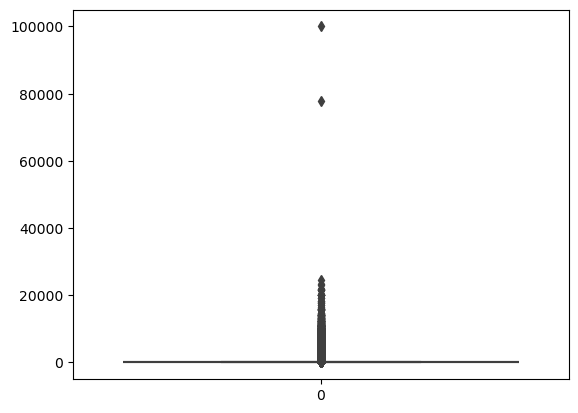

In [103]:
sns.boxplot(data= df.price)
plt.show()

In this visualizations we can see that there are too many outliers which is making the visualizations not clear. Most of the values are centred in the 0 value from the y axis. We cannot really see where the data stands here or even the box and interquartile. In other to solve it we would have to deal with the outliers and clean the data.
Resuming, we can indeed conclude that there are products that are extremely high comparing to most of the products in the df.

**Part 3:** Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [108]:
mean_rating= df.stars.mean()
round(mean_rating, 2)

2.15

In [119]:
median_rating=df.stars.median()
median_rating

0.0

In [120]:
mode_rating= df.stars.mode()
mode_rating

0    0.0
Name: stars, dtype: float64

In this analysis we can conclude that most of the customers rate the products as 0.0 or do not even rate the products as the mode and median are both 0.0. We can see that the mean is 2,15 therefore we can conclude that some products have higher ratings rising the mean.

In [122]:
variance_rating= df.stars.var()
round(variance_rating, 2)

4.82

In [124]:
std_rating= df.stars.std()
round(std_rating, 2)

2.19

In [125]:
q1_rating= df.stars.quantile(0.25)
q1_rating

0.0

In [126]:
q3_rating= df.stars.quantile(0.75)
q3_rating

4.4

In [128]:
interquartile_rating= q3_rating- q1_rating
interquartile_rating

4.4

In [127]:
#summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


We can see a high variance in the products ratings which tells us that these ratings are not consistent. As seen previously most of the products have 0.0 rating, being the max 5.0 we can see clearly a big discrepancy in addition with the mean 2.19. We can say that some products have very high ratings altering then the median significantly, the called outliers.

In [130]:
df.stars.skew().round(2)

0.08

In [132]:
df.stars.kurtosis().round(2)

-1.93

The skewness is 0.08 which shows that is positively skewed, which means that are a significant number of products with high ratings pushing the mean up.
The kurtosis is -1.93 so the distribution is platykurtic, which shows that some products are quite extreme compared to the other. The kurtosis shows us that the data is very spread around the mean.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


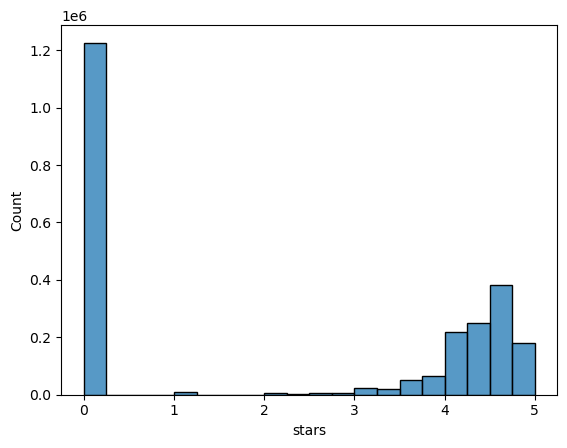

In [133]:
sns.histplot(df.stars, bins=20)
plt.show()

Looking at the histplot we can see the predominance of o.o ratings in the products of the df, followed by ratings between 4 and 5 stars.
We can also confirm that is positively skewed.